In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
credit_info = pd.read_csv("creditcard.csv")

In [15]:
# Shuffle data
credit_info_shuffled = credit_info.sample(frac=1)
# one-hot encode the target variable
#credit_info_encoded = pd.get_dummies(credit_info_shuffled, columns=["Class"])

# Splitting the data into train and test
training_size = int(0.8 * len(credit_info_shuffled))
Training_set = credit_info_shuffled.iloc[:training_size, :]
Test_set = credit_info_shuffled.iloc[training_size:, :]
# Separate out the input variables and the target variables
X_train = Training_set.iloc[:, :-1]
y_train = Training_set.iloc[:, -1:]
X_test = Test_set.iloc[:, :-1]
y_test = Test_set.iloc[:, -1:]
# min-max normalize the data using MinMaxScaler
normalizer = MinMaxScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)
# Adding weighting to the fraud class to tackle the imbalanced data problem
#fraud_ratio = credit_info["Class"].value_counts()[1] / len(credit_info)
#fraud_weighting = 1 / fraud_ratio
#y_train.iloc[:, 0] = y_train.iloc[:, 0] * fraud_weighting * 1.5

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [21]:
y_train.iloc[:,0].value_counts()/y_train.shape[0]

0    0.998231
1    0.001769
Name: Class, dtype: float64

In [23]:
y_test.iloc[:,0].value_counts()/y_test.shape[0]

0    0.998438
1    0.001562
Name: Class, dtype: float64

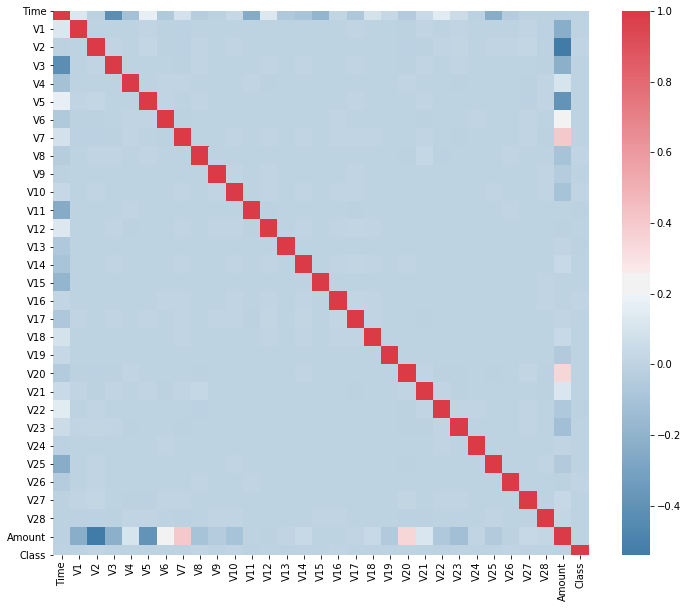

In [19]:
plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(X_train_scaled.join(y_train).corr(), cmap = cmap)
plt.show()

Some of the variables are weakly correlated with each other, but none are strongly correlated with the target variables

In [24]:
# Let's use random forest to get some ideas about feature importance
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
pd.Series(rf.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)

V17       0.171231
V12       0.141023
V14       0.112843
V10       0.096971
V16       0.072535
V11       0.055873
V18       0.033690
V4        0.031472
V7        0.025641
V9        0.023434
V26       0.020542
V3        0.017822
V6        0.016349
V21       0.015562
V20       0.013019
V1        0.012738
V19       0.011680
Time      0.011469
V22       0.011182
Amount    0.011071
V2        0.010938
V27       0.010511
V8        0.010496
V15       0.010492
V28       0.009671
V13       0.009536
V24       0.009424
V5        0.007679
V23       0.007649
V25       0.007456
dtype: float64

V17, V12, V14, V10, V16 and V11 appear to be more useful in predicting the target values


In [33]:
y_pred = rf.predict(X_test_scaled)

In [34]:
accuracy_score(y_test, y_pred)

0.9995084442259752

In [ ]:
precision_score(y)